<a href="https://colab.research.google.com/github/zeeshn99/DailyDialog-Graphs/blob/main/Graphs_of_dailydialog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install datasets
!pip install networkx
!pip install sentence_transformers 
!pip install rouge-score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from datasets import load_dataset
dataset = load_dataset("daily_dialog")
import networkx as nx
from tqdm import tqdm
import numpy as np
import codecs
from collections import Counter
import random
import operator
import regex as re
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer

Using custom data configuration default
Reusing dataset daily_dialog (/root/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model = SentenceTransformer('all-mpnet-base-v2') # for semantic similarity using cosin similarity 

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [5]:
dataset['train'][11117]


{'act': [3, 4],
 'dialog': ['Could I have the check , please ? ',
  " Okay . I'll just be a minute . "],
 'emotion': [0, 0]}

Printing Conversations 

In [9]:
dialogues = []
for i in range(10):
  # print(i)
  # print((len(dataset['train'][7]['dialog'])))
  for j in range(len(dataset['train'][i]['dialog'])):
    dialogues.append(dataset['train'][i]['dialog'][j])
    print(dataset['train'][i]['dialog'][j])
  print('\n')
  print('conversation ends')

Say , Jim , how about going for a few beers after dinner ? 
 You know that is tempting but is really not good for our fitness . 
 What do you mean ? It will help us to relax . 
 Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? 
 I guess you are right.But what shall we do ? I don't feel like sitting at home . 
 I suggest a walk over to the gym where we can play singsong and meet some of our friends . 
 That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . 
 Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . 
 Good.Let ' s go now . 
 All right . 


conversation ends
Can you do push-ups ? 
 Of course I can . It's a piece of cake ! Believe it or not , I can do 30 push-ups a minute . 
 Really ? I think that's impossible ! 
 You mean 30 push-ups ? 
 Yeah ! 
 It's easy . If you do exercise everyday , you can 

Making graph of each conversation and storing graphs into gpickle file

In [10]:
dialogues = []
for z in tqdm(range(10)):
  G = nx.DiGraph()
  dataset['train'][z]
  lim=len(dataset['train'][z]['dialog'])

  for i in range(lim):
  # print(ii
  # print((len(dataset['train'][7]['dialog'])))
   #for j in range(len(dataset['train'][i]['dialog'])):

        # dialogues.append(dataset['train'][i]['dialog'][j])
         G.add_node(dataset['train'][z]['dialog'][i])
         
         if i>=1:
            G.add_edge(dataset['train'][z]['dialog'][i-1],dataset['train'][z]['dialog'][i])
  nx.write_gpickle(G, "/content/drive/MyDrive/graphs/g"+str(z)+".gpickle")     
  

    #     print(dataset['train'][i]['dialog'][j])
    # print('\n')
    # print('conversation ends')

100%|██████████| 10/10 [00:02<00:00,  3.86it/s]


In [11]:
pick= nx.read_gpickle("/content/drive/MyDrive/graphs/g9.gpickle") #reading gpickle files of above graphs


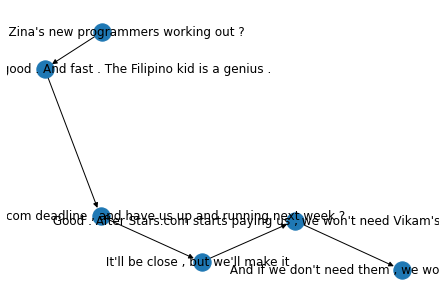

In [12]:
nx.draw(pick,with_labels = True )

Finding duplicates

In [13]:
dialogues = []
for z in tqdm(range(10)):
  G = nx.DiGraph()
  dataset['train'][z]
  lim=len(dataset['train'][z]['dialog'])

  for i in range(lim):
  # print(ii
  # print((len(dataset['train'][7]['dialog'])))
   #for j in range(len(dataset['train'][i]['dialog'])):

        # dialogues.append(dataset['train'][i]['dialog'][j])
         G.add_node(dataset['train'][z]['dialog'][i])
        
         
         if i>=1:
            G.add_edge(dataset['train'][z]['dialog'][i-1],dataset['train'][z]['dialog'][i])

  indic=dataset['train'][z]['dialog']
  indic1=[]
  for i in indic:
   j = i.strip()
   indic1.append(j)
  
  uniDict = dict(Counter(indic1))    
  dialogues.append(uniDict)          
  nx.write_gpickle(G, "/content/drive/MyDrive/graphs/g"+str(z)+".gpickle")     
  

    #     print(dataset['train'][i]['dialog'][j])
    # print('\n') 
    # print('conversation ends')

100%|██████████| 10/10 [00:00<00:00, 131.93it/s]


In [14]:
uniDict

{"And if we don't need them , we won't need Zina , either .": 1,
 "Good . After Stars.com starts paying us , we won't need Vikam's cash anymore .": 1,
 "How are Zina's new programmers working out ?": 1,
 "I hate to admit it , but they're good . And fast . The Filipino kid is a genius .": 1,
 "It'll be close , but we'll make it .": 1,
 "So you'll make the Stars.com deadline , and have us up and running next week ?": 1}

In [15]:
dialogues

[{'All right .': 1,
  "Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?": 1,
  "Good.Let ' s go now .": 1,
  "I guess you are right.But what shall we do ? I don't feel like sitting at home .": 1,
  'I suggest a walk over to the gym where we can play singsong and meet some of our friends .': 1,
  'Say , Jim , how about going for a few beers after dinner ?': 1,
  'Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too .': 1,
  "That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them .": 1,
  'What do you mean ? It will help us to relax .': 1,
  'You know that is tempting but is really not good for our fitness .': 1},
 {'Can you do push-ups ?': 1,
  "It's easy . If you do exercise everyday , you can make it , too .": 1,
  "Of course I can . It's a piece of cake ! Believe it or not , I can do 30 push-ups a minute ."

In [18]:
def evaluation(true_ans, user_ans): #For sementic similarity using cosin
    if (isinstance(true_ans, list) == True):
        marks = []
        for i in range(len(true_ans)):
            true_embed = model.encode(true_ans[i], convert_to_tensor=True)
            user_embed = model.encode(user_ans, convert_to_tensor=True) 
            cosine_scores = util.pytorch_cos_sim(true_embed, user_embed)
            score = cosine_scores.item()
            marks.append(score)
        if (max(marks) > 0.9):
            return 1
        else:
            return max(marks)
    else:
        true_embed = model.encode(true_ans, convert_to_tensor=True)
        user_embed = model.encode(user_ans, convert_to_tensor=True)
        cosine_scores = util.pytorch_cos_sim(true_embed, user_embed)
        return cosine_scores.item()

In [19]:
s1="All right ok"
s2="Its All right, my name is zeeshan"

In [20]:
 ans=evaluation(s1,s2)

In [21]:
ans

0.24527791142463684

In [22]:

scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
scores = scorer.score(s1,s2)
scores

{'rouge1': Score(precision=0.2857142857142857, recall=0.6666666666666666, fmeasure=0.4)}